In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from prob import data, keys, in_memory_rfc#load_model

In [2]:
train, test = train_test_split(data, test_size=.2)

rfc = in_memory_rfc(train)

data = test

34.0
0.42466965691788516


<Axes: >

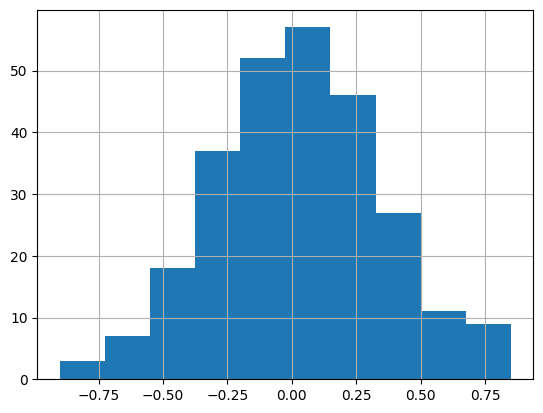

In [3]:
y_pred = rfc.predict(data[keys])
o_proba = rfc.predict_proba(data[keys])[:, 1]
y_true = data["favwin01"]
print(np.sum(np.square(y_true - y_pred)))
print(np.sum(np.square(y_true - o_proba))/np.sum(np.square(y_true - y_true.mean())))
(y_true - o_proba).hist()

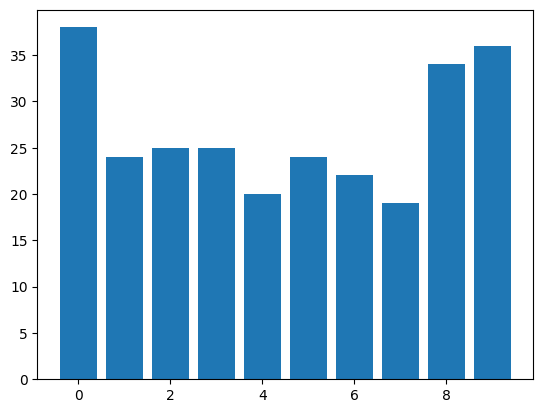

In [4]:
b = [(i + 1) * .1 for i in range(10)]
b[-1] += .01
b[0] -= .01
bins = np.digitize(o_proba, b)
counts = [np.sum(bins == i) for i in range(10)]
plt.bar(range(10), counts)
plt.show()

<Axes: >

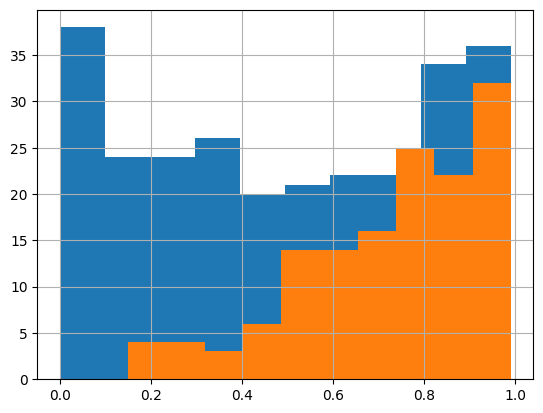

In [5]:
pd.Series(o_proba).hist()
pd.Series(o_proba[data["favwin01"] == 1]).hist()

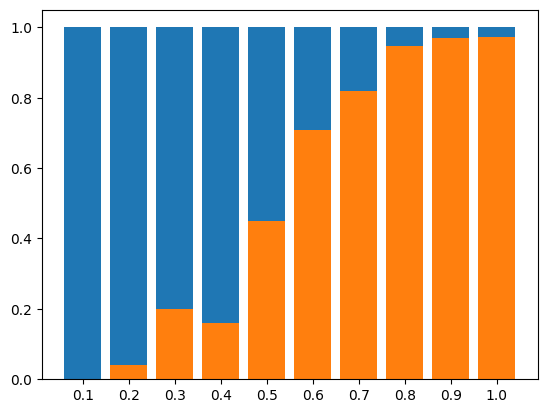

In [10]:
b = [(i + 1) * .1 for i in range(10)]
b[-1] += .01
b[0] -= .01
bins = np.digitize(o_proba, b)
counts = [np.mean(data["favwin01"][bins == i] == 1) for i in range(10)]#[np.sum(bins == i) for i in range(10)]
plt.bar(range(10), 1)
plt.bar(range(10), counts)
plt.xticks(range(10), labels=["{:.1f}".format((i + 1) * .1) for i in range(10)])
plt.show()

In [7]:
print(data[keys].mean())
print(data[keys].std())
print(data[keys].median())
print(data[keys].min())
print(data[keys].max())

away_losses0                          4.857678
conference_losses0                    4.955056
conference_wins0                     12.632959
games_played0                        35.838951
home_wins0                           14.089888
losses0                               9.288390
pace0                                66.922846
simple_rating_system0                13.857041
turnover_percentage0                 15.007865
wins0                                26.550562
block_percentage1                    10.904869
conference_losses1                    5.078652
games_played1                        35.958801
home_wins1                           14.314607
losses1                               9.411985
opp_offensive_rebound_percentage1    30.094757
steal_percentage1                     9.877903
strength_of_schedule1                 5.887341
wins1                                26.546816
_constant                             1.000000
dtype: float64
away_losses0                         2.431460